In [1]:
import pandas as pd
root_path = "results/idsprites"
exps = pd.read_csv(f"{root_path}/experiments.csv")

In [2]:
n_steps = 60000
filenames = []
for n_steps in [60000,120000,180000,240000,300000]:
    filenames += list(exps['exp_id']+"_"+exps['dataset'].astype(str) +f"_{n_steps}.csv")
filenames = [f'{root_path}/{f}' for f in filenames]

In [3]:
filenames

['results/idsprites/2zl5pgb9_24_60000.csv',
 'results/idsprites/gd9cgkg9_14_60000.csv',
 'results/idsprites/rudjfvq9_34_60000.csv',
 'results/idsprites/th9s1nty_54_60000.csv',
 'results/idsprites/2zl5pgb9_24_120000.csv',
 'results/idsprites/gd9cgkg9_14_120000.csv',
 'results/idsprites/rudjfvq9_34_120000.csv',
 'results/idsprites/th9s1nty_54_120000.csv',
 'results/idsprites/2zl5pgb9_24_180000.csv',
 'results/idsprites/gd9cgkg9_14_180000.csv',
 'results/idsprites/rudjfvq9_34_180000.csv',
 'results/idsprites/th9s1nty_54_180000.csv',
 'results/idsprites/2zl5pgb9_24_240000.csv',
 'results/idsprites/gd9cgkg9_14_240000.csv',
 'results/idsprites/rudjfvq9_34_240000.csv',
 'results/idsprites/th9s1nty_54_240000.csv',
 'results/idsprites/2zl5pgb9_24_300000.csv',
 'results/idsprites/gd9cgkg9_14_300000.csv',
 'results/idsprites/rudjfvq9_34_300000.csv',
 'results/idsprites/th9s1nty_54_300000.csv']

In [4]:
all_df = pd.DataFrame()
for f in filenames:
    shapes = f.split("_")[1]
    steps = f.split("_")[2].replace(".csv","")
    df = pd.read_csv(f)
    df['n_shapes'] = int(shapes)
    df['steps'] = int(steps)
    all_df = pd.concat([all_df, df], ignore_index=True)

all_df['abs_delta'] = all_df['delta'].abs()

In [5]:
# Create Delta 
grouped_df = all_df.groupby(['abs_delta','n_shapes','setting','attribute','steps']).agg({'sum': ['sum'],'count':['sum']}).reset_index()
grouped_df['acc'] = grouped_df[('sum', 'sum')]/ grouped_df[('count', 'sum')]
grouped_df.columns = ['_'.join(col)[:-1] for col in grouped_df.columns]
attribute_order = ["shape", "scale", "orientation", "x", "y"]

# Convert 'attribute' to categorical with the specified order
grouped_df["attribute"] = pd.Categorical(grouped_df["attribute"], categories=attribute_order, ordered=True)

# X-Axis = Delta
# Y-Axis  = accuracy

In [6]:
grouped_df

,abs_delta,n_shapes,setting,attribute,steps,sum_su,count_su,acc
0,1,14,iid-iid,orientation,60000,150,1773,0.084602
1,1,14,iid-iid,orientation,120000,132,1710,0.077193
2,1,14,iid-iid,orientation,180000,145,1702,0.085194
3,1,14,iid-iid,orientation,240000,148,1703,0.086905
4,1,14,iid-iid,orientation,300000,157,1753,0.089561
...,...,...,...,...,...,...,...,...
1995,5,54,ood-ood,y,60000,28364,158483,0.178972
1996,5,54,ood-ood,y,120000,28883,158712,0.181984
1997,5,54,ood-ood,y,180000,27809,159088,0.174803
1998,5,54,ood-ood,y,240000,27632,158901,0.173894


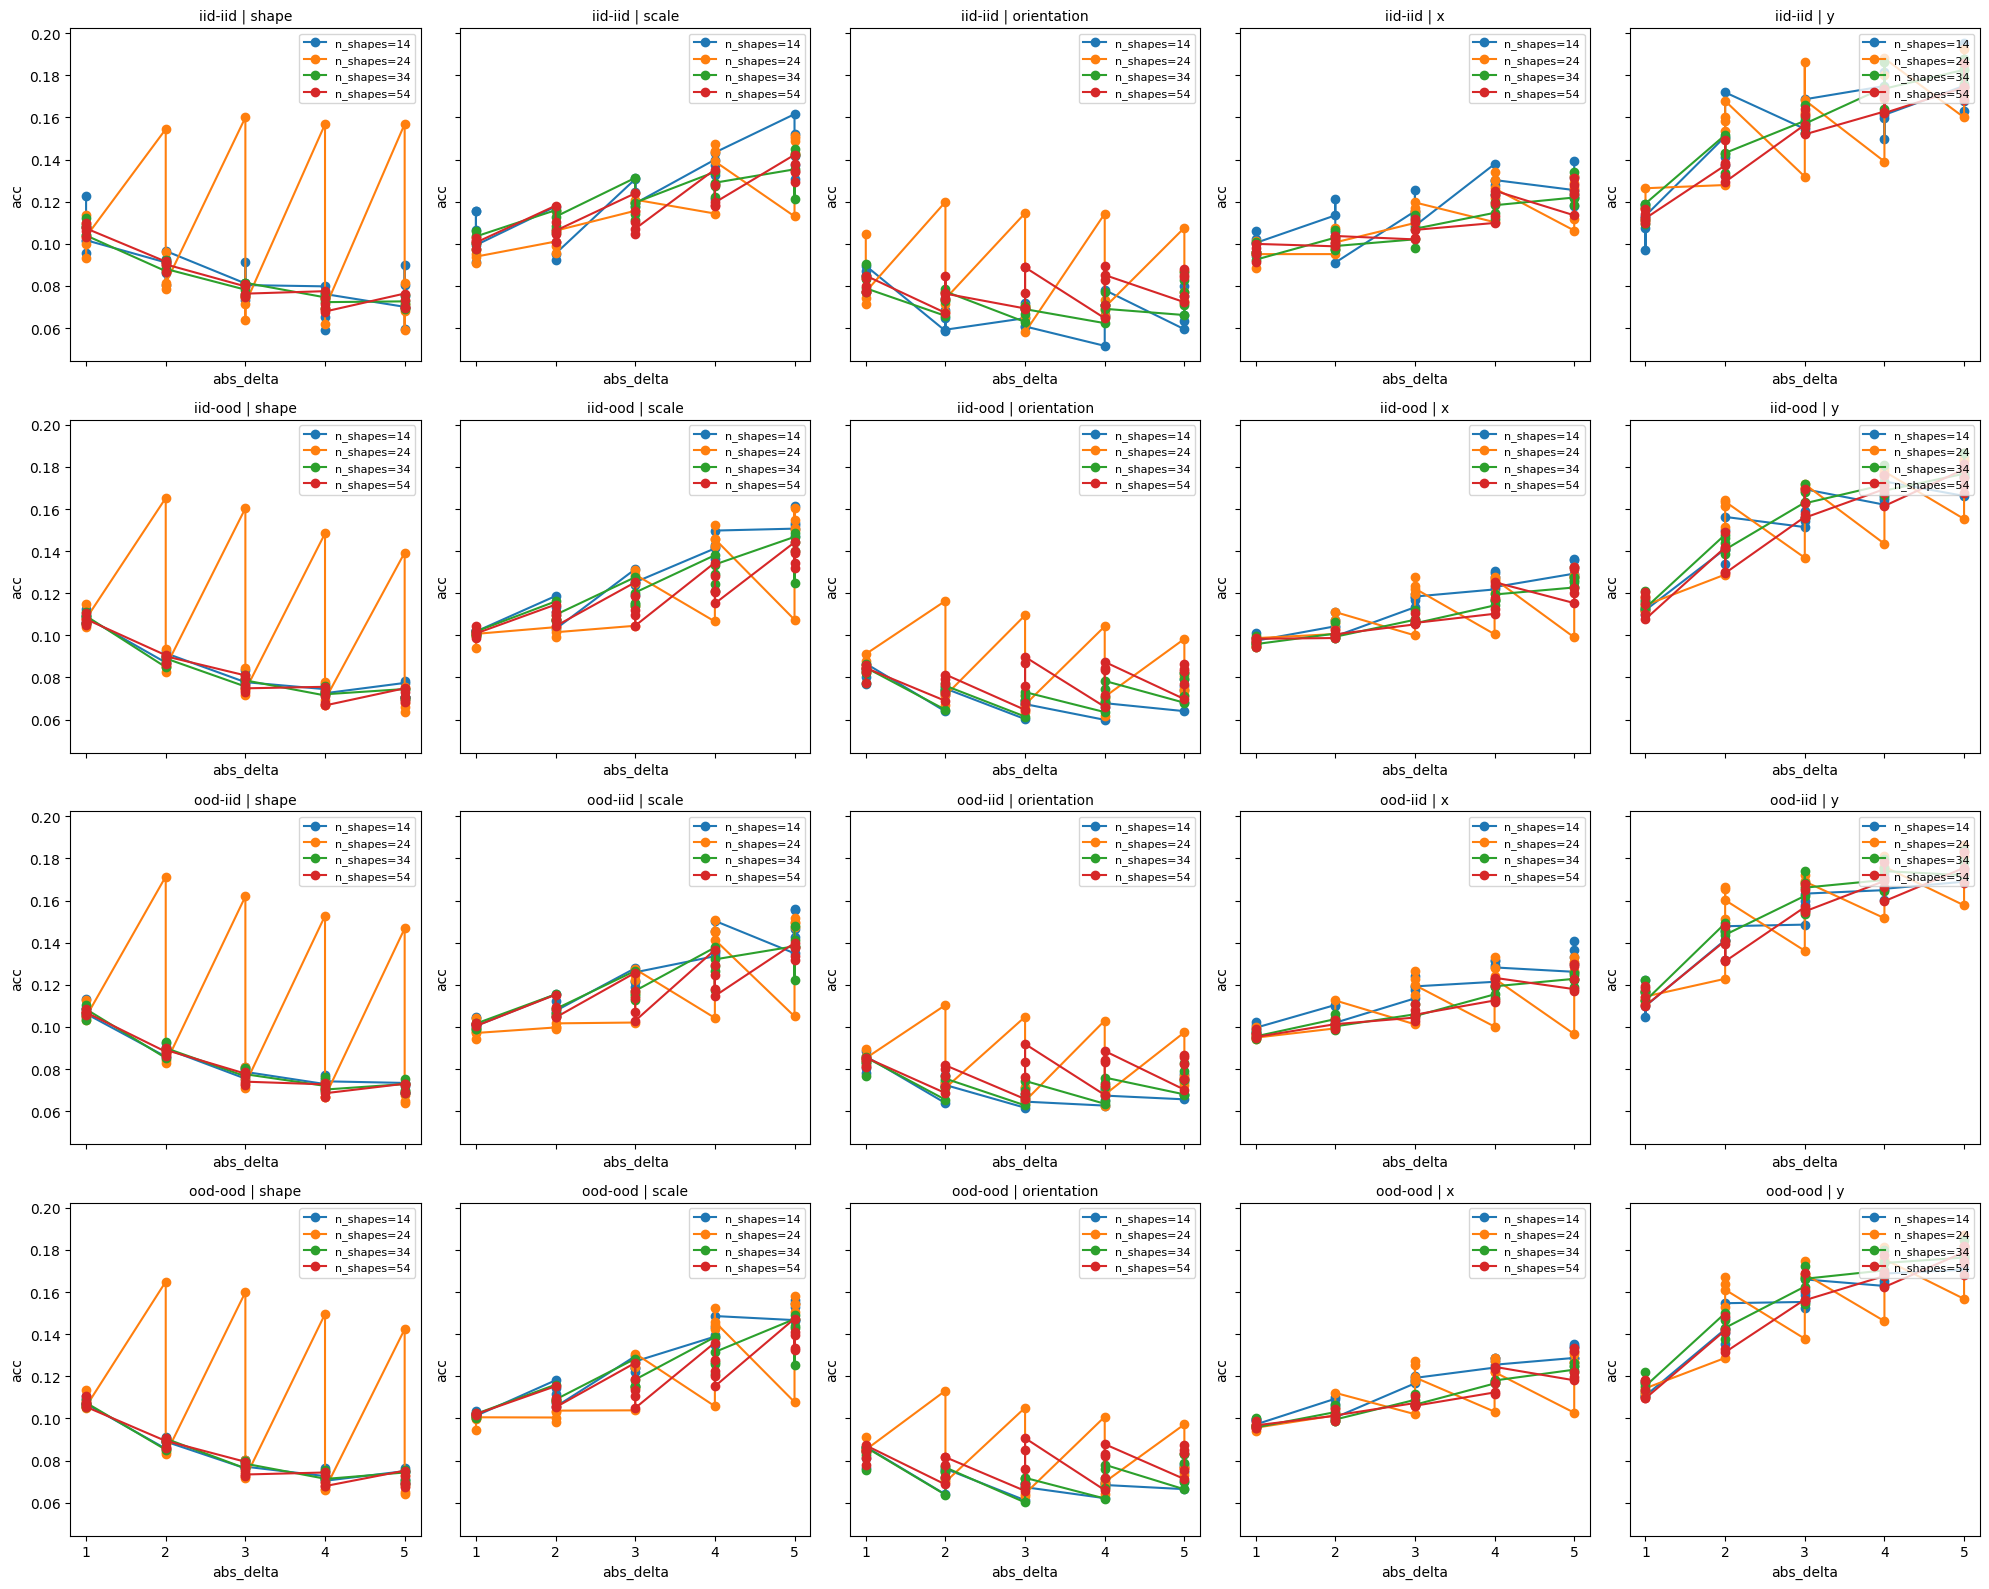

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame (assuming you already have it)
# df = pd.read_csv("your_data.csv")  # Uncomment if loading from a file

# Get unique values to define grid layout
settings = grouped_df["setting"].unique()
attributes = attribute_order  # Use predefined order

# Set up the grid of subplots
fig, axes = plt.subplots(len(settings), len(attributes), figsize=(4 * len(attributes), 4 * len(settings)), sharex=True, sharey=True)

# Ensure axes is always a 2D array for easy indexing
if len(settings) == 1:
    axes = [axes]
if len(attributes) == 1:
    axes = [[ax] for ax in axes]

# Loop through each setting and attribute combination
for i, setting in enumerate(settings):
    for j, attribute in enumerate(attributes):
        ax = axes[i][j]

        # Filter data for current setting and attribute
        subset = grouped_df[(grouped_df["setting"] == setting) & (grouped_df["attribute"] == attribute)]

        # Plot each n_shapes as a separate line
        for n_shapes in subset["n_shapes"].unique():
            sub_subset = subset[subset["n_shapes"] == n_shapes]
            ax.plot(sub_subset["abs_delta"], sub_subset["acc"], marker='o', linestyle='-', label=f"n_shapes={n_shapes}")

        # Labels and titles
        ax.set_title(f"{setting} | {attribute}", fontsize=10)
        ax.set_xlabel("abs_delta")
        ax.set_ylabel("acc")
        ax.legend(fontsize=8, loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()


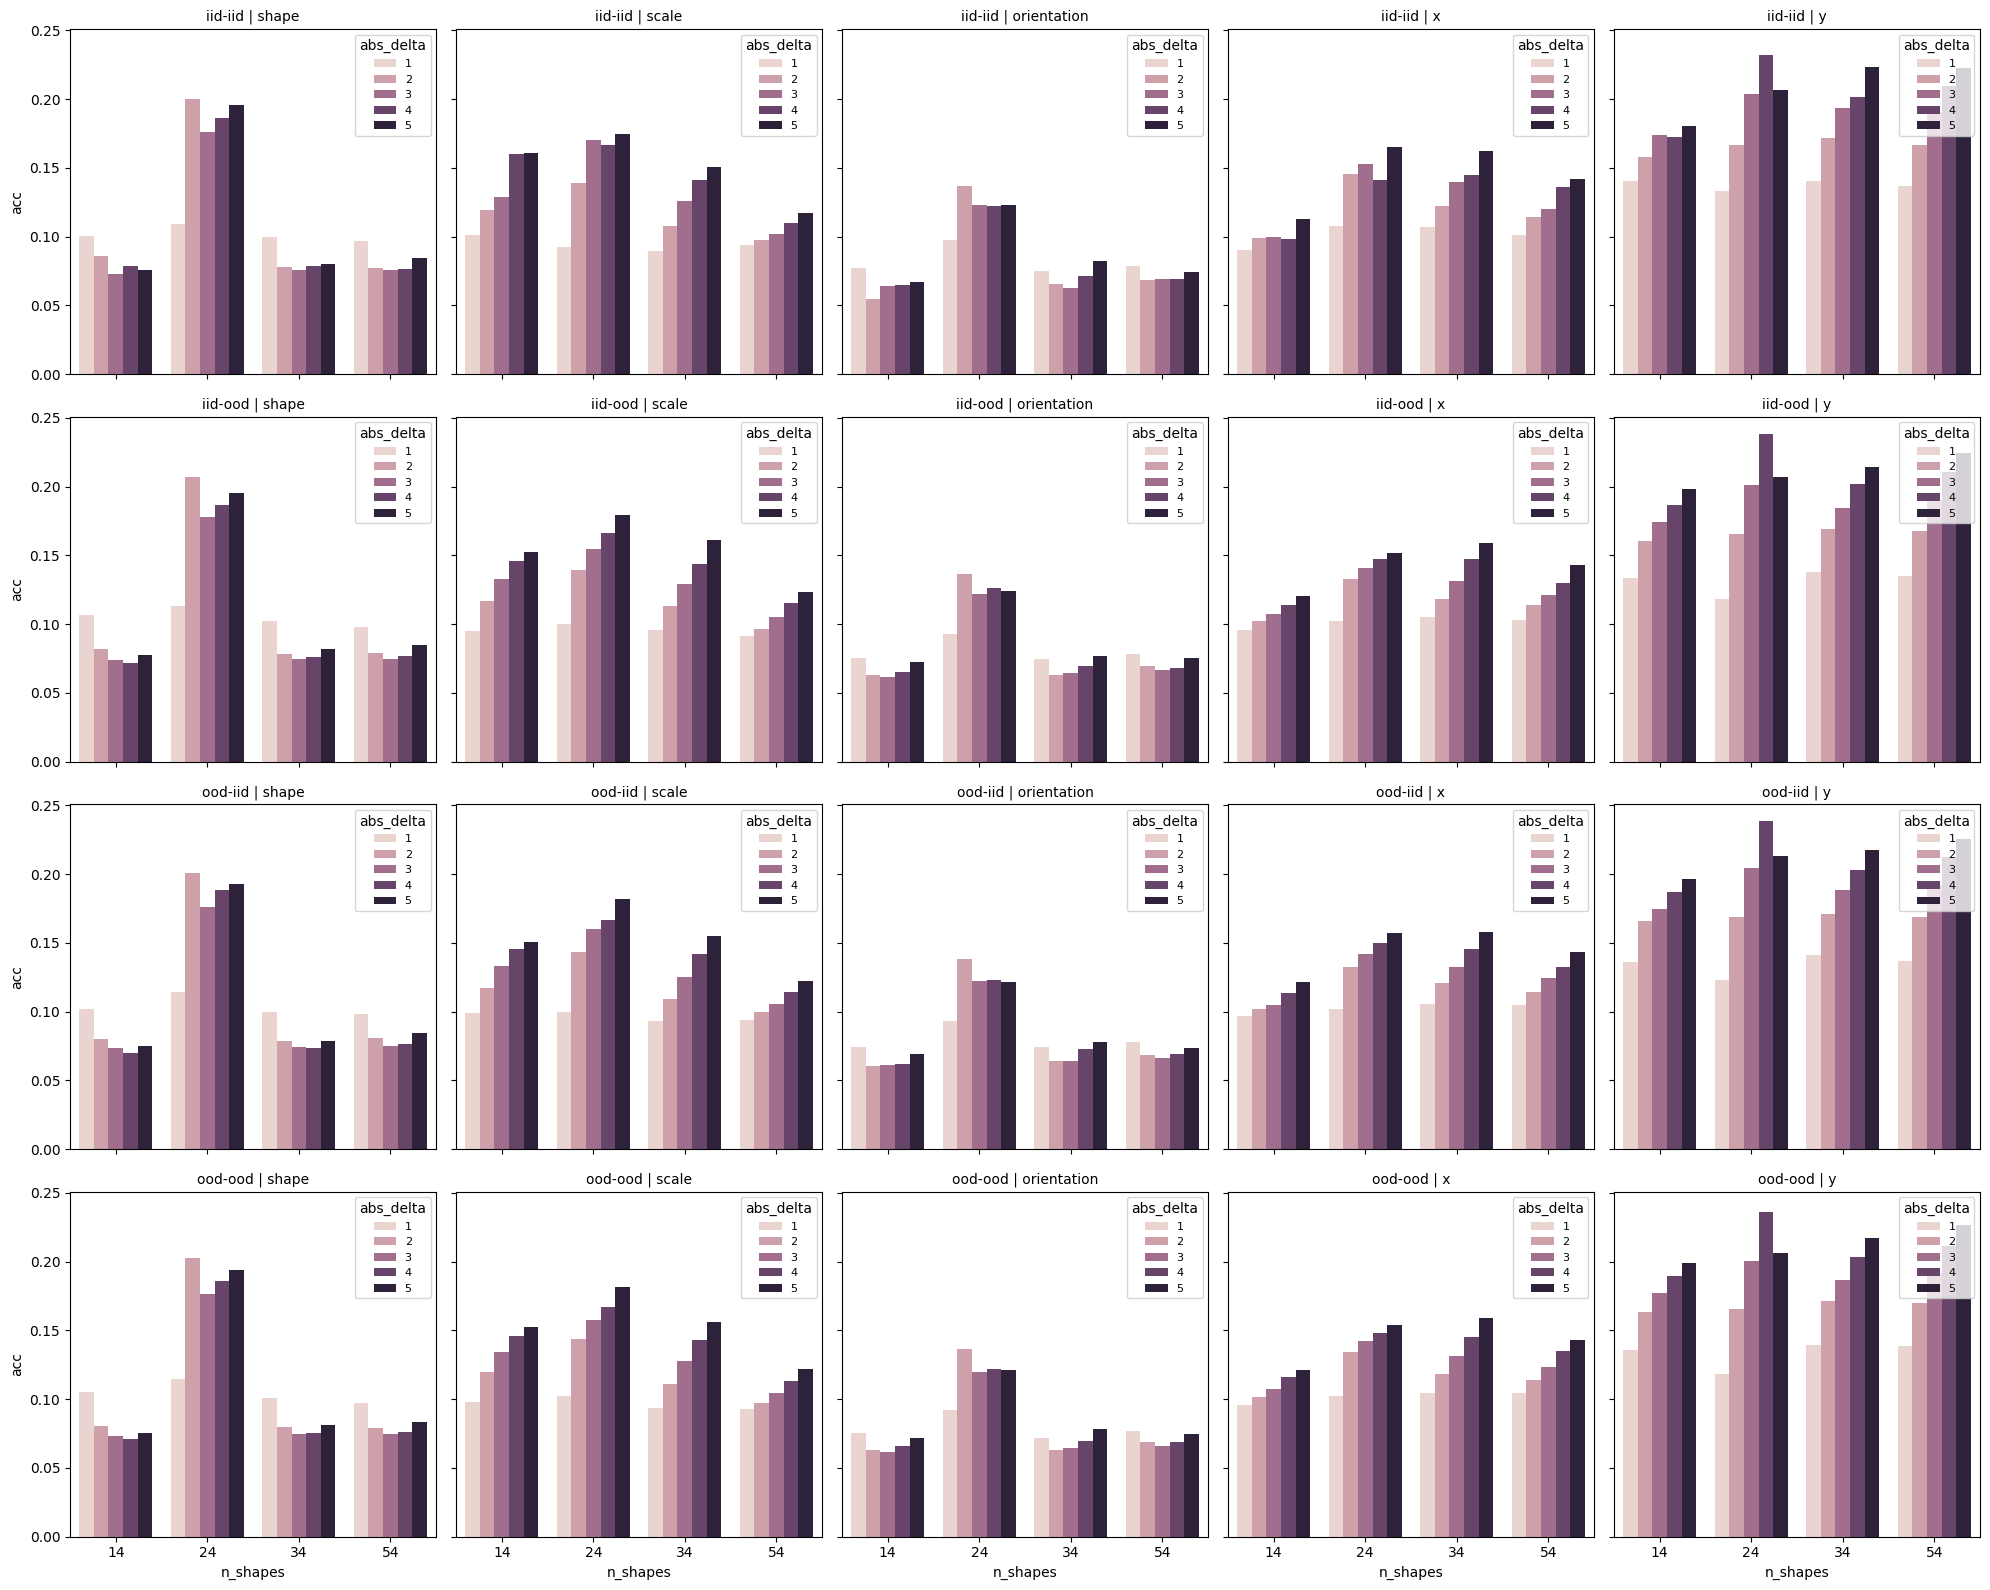

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique values for settings and attributes to define the grid layout
settings = grouped_df["setting"].unique()
attributes = attribute_order  # Use predefined order
# Set up the grid of subplots
fig, axes = plt.subplots(len(settings), len(attributes), figsize=(4 * len(attributes), 4 * len(settings)), sharex=True, sharey=True)

# Ensure axes is always a 2D array for easy indexing
if len(settings) == 1:
    axes = [axes]
if len(attributes) == 1:
    axes = [[ax] for ax in axes]

# Loop through each setting and attribute combination
for i, setting in enumerate(settings):
    for j, attribute in enumerate(attributes):
        ax = axes[i][j]

        # Filter data for current setting and attribute
        subset = grouped_df[(grouped_df["setting"] == setting) & (grouped_df["attribute"] == attribute)]

        # Create bar chart using Seaborn
        sns.barplot(data=subset, x="n_shapes", y="acc", hue="abs_delta", ax=ax, dodge=True)

        # Labels and titles
        ax.set_title(f"{setting} | {attribute}", fontsize=10)
        ax.set_xlabel("n_shapes")
        ax.set_ylabel("acc")
        ax.legend(title="abs_delta", fontsize=8, loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipykernel_381741/689215184.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avg = grouped_df.groupby(["steps", "n_shapes", "setting", "attribute"], as_index=False)["acc"].mean()


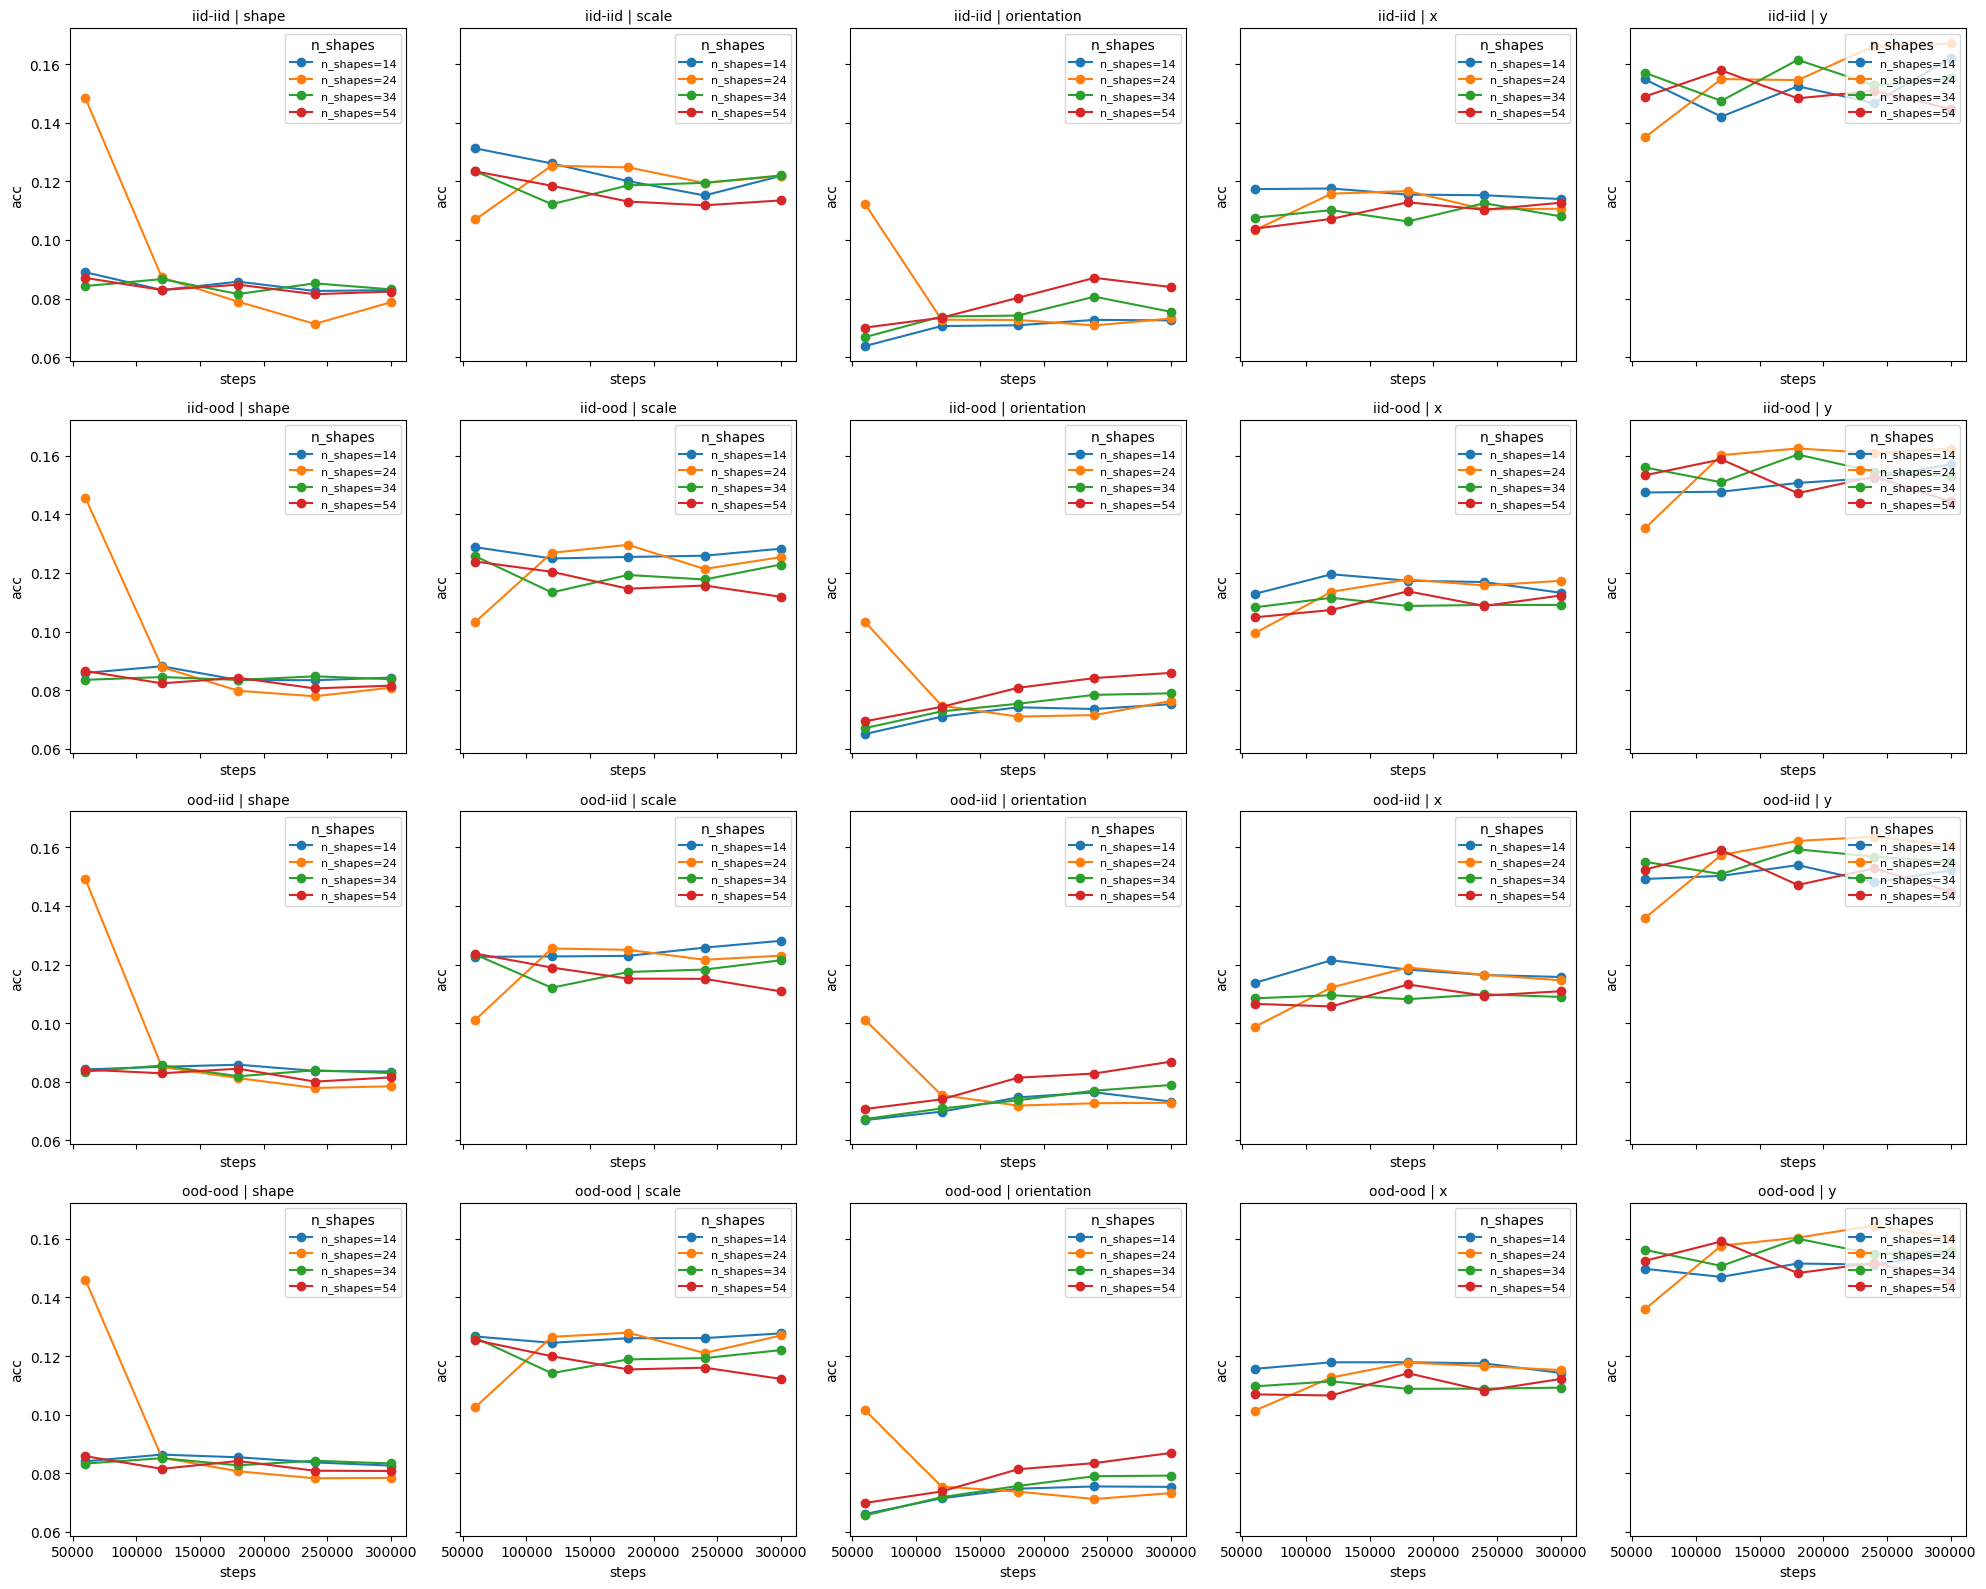

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the desired attribute order
attribute_order = ["shape", "scale", "orientation", "x", "y"]

# Convert 'attribute' to categorical with the specified order
grouped_df["attribute"] = pd.Categorical(grouped_df["attribute"], categories=attribute_order, ordered=True)
df_avg = grouped_df.groupby(["steps", "n_shapes", "setting", "attribute"], as_index=False)["acc"].mean()
df_avg = df_avg.sort_values(by=["steps", "n_shapes"])

# Get unique values (ensuring correct order)
settings = grouped_df["setting"].unique()
attributes = attribute_order  # Use predefined order

# Set up the grid of subplots
fig, axes = plt.subplots(len(settings), len(attributes), figsize=(4 * len(attributes), 4 * len(settings)), sharex=True, sharey=True)

# Ensure axes is always a 2D array for easy indexing
if len(settings) == 1:
    axes = [axes]
if len(attributes) == 1:
    axes = [[ax] for ax in axes]

# Loop through each setting and attribute combination
for i, setting in enumerate(settings):
    for j, attribute in enumerate(attributes):
        ax = axes[i][j]

        # Filter data for current setting and attribute
        subset = df_avg[(df_avg["setting"] == setting) & (df_avg["attribute"] == attribute)]

        # Plot each n_shapes as a separate line (now averaged over abs_delta)
        for n_shapes in subset["n_shapes"].unique():
            sub_subset = subset[subset["n_shapes"] == n_shapes]
            ax.plot(sub_subset["steps"], sub_subset["acc"], marker='o', linestyle='-', label=f"n_shapes={n_shapes}")


        # Labels and titles
        ax.set_title(f"{setting} | {attribute}", fontsize=10)
        ax.set_xlabel("steps")
        ax.set_ylabel("acc")
        ax.legend(title="n_shapes", fontsize=8, loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()
